# Карташов ДД, ИМ17-06Б
# Триангуляция; проверка условия Делоне

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (14,14)

In [394]:
def show(E,weight = [],P = [],face = [], M =[],G = [],g ='',circ = False):
    res = []
    for e in E:
        res.append([e[0][0],e[1][0]])
        res.append([e[0][1],e[1][1]])
    fig, ax = plt.subplots()
    for i in range(1,len(res),2):
        if len(weight) == 0: st = ''
        else:
            st = str(weight[i//2])
        x1,x2 = res[i-1][0],res[i-1][1]
        y1,y2 = res[i][0],res[i][1]
        ax.plot(res[i-1], res[i],'hb-')
        ax.text((x1+x2)/2, (y1+y2)/2, st,fontsize = 20)
    if len(face) != 0:
        y = []
        x = []
        for e in face:
            
            x.append(e[0][0])
            y.append(e[0][1])
        ax.fill(x,y,facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
    if len(P) != 0:
        ax.plot(P[0],P[1],'^g',markersize = 15)
    if len(M) !=0:
        for m in M:
            ax.text(m[0],m[1],str(m),fontsize = 15)
    if len(G) != 0:
        for i in range(len(G)):
            if len(g) != 0:
                if g == 'Г{}'.format(i):
                    ax.text(G[i][0],G[i][1],'Г{}'.format(i),fontsize = 15,color = 'r')
                else:
                    ax.text(G[i][0],G[i][1],'Г{}'.format(i),fontsize = 15)
    if circ == True:
        try:
            r = d(M[0],P)
        except:
            r = d(M[-1],P)
        x = np.linspace(P[0]-r,P[0]+r,100)
        y1 = (r**2 - (x-P[0])**2)**0.5 + P[1]
        y2 = -(r**2 - (x-P[0])**2)**0.5 + P[1]
        ax.plot(x,y1,'r--',x,y2,'r--')
        
    fig

# Несколько функций

## После них будет задача

In [4]:
def combination(M,k):
    '''
    последовательно генерирует комбинации k элементов из множества M
     мы будем его использовать для генерации индексов точек
    '''
    n = len(M)
    A = M[:k]
    p = k
    while True:
        yield A
        if A[k-1] == n:
            p -= 1
        else:
            p = k
        if p >= 1:
            for i in range(k,p-1,-1):
                A[i-1] = A[p-1] + i - p + 1
        else: break

In [206]:
def isCross(a1,a2,a3,a4):
    '''
    проверяет, пересекаются ли два отрезка
    '''
    denum = (a4[1]-a3[1])*(a2[0]-a1[0])-(a4[0]-a3[0])*(a2[1]-a1[1])
    if denum == 0: return 0
    t2 = ((a4[0]-a3[0])*(a1[1]-a3[1])-(a4[1]-a3[1])*(a1[0]-a3[0]))/denum
    t1 = ((a2[0]-a1[0])*(a1[1]-a3[1])-(a2[1]-a1[1])*(a1[0]-a3[0]))/denum
    
    return (0<t2<1 and 0<t1<1) or\
           (0<t1<1 and (t2 == 0 or t2 == 1)) or\
           (0<t2<1 and (t1 == 0 or t1 == 1))

In [6]:
def existCross(E,a1,a2):
    '''
    проверяет, имеется ли пересечение некоторого ребра со множеством других ребер
    '''
    for e in E:
        if [a1,a2] != e:
            if isCross(a1,a2,e[0],e[1]) == 1: return 1
    return 0

In [7]:
def d(a1,a2):
    '''
    расстояние между двумя точками
    '''
    return ((a2[0]-a1[0])**2+(a2[1]-a1[1])**2)**0.5

In [169]:
def makeTriang(M): 
    '''
    триангуляция
    '''
    E = [] # инициализируем список всех ребер
    ds = [] # список длин ребер
    Eres = [] # инициализируем текущий список ребер
    m = [i for i in range(1,len(M)+1)] # индексы точек
    for i,j in combination(m,2): # берем все возможные комбинации двух элементов из m
        a1 = list(M[i-1])
        a2 = list(M[j-1])
        E += [[a1,a2]]  # добавляем ребро в список ребер
    E =  [getUpDown(e) for e in E]
    E = sortEdges(E,M)
    for e in E:
        ds += [d(e[0],e[1])]# вычисляем его длину и заносим в соответствующий список
    df = pd.DataFrame({'e':E,'d':ds})
    df = df.sort_values('d') # сортируем ребра по длине
    E = list(df['e'])
    #Eres = [E[0]]
    for e in E[0:]: # теперь идем по всем ребрам от самого короткого и до самого длинного
        if existCross(Eres,e[0],e[1]) == 0: # если это ребро не будет пересекать текущую (почти пока еще) триангуляцию
            Eres += [e] # то добавляем его в список ребер триангуляции
    return Eres

# Задача. Сгенерируем несколько точек, построим триангуляцию и проведем проверку всех треугольников из триангуляции на выполнение условия Делоне

# ШАГ 1: триангуляция

In [266]:
# генерируем список точек
a,b = 10,10
n = 4
ys = np.random.randint(-a,a,n)
xs = np.random.randint(-b,b,n)
M = [[float(xs[i]),float(ys[i])] for i in range(len(xs))]
M = [[i[0],i[1]] for i in np.unique(M,axis = 0).astype(int)]
M = quicksort(M,Less)

In [268]:
# выделяем триангуляцию
Eres = makeTriang(M)

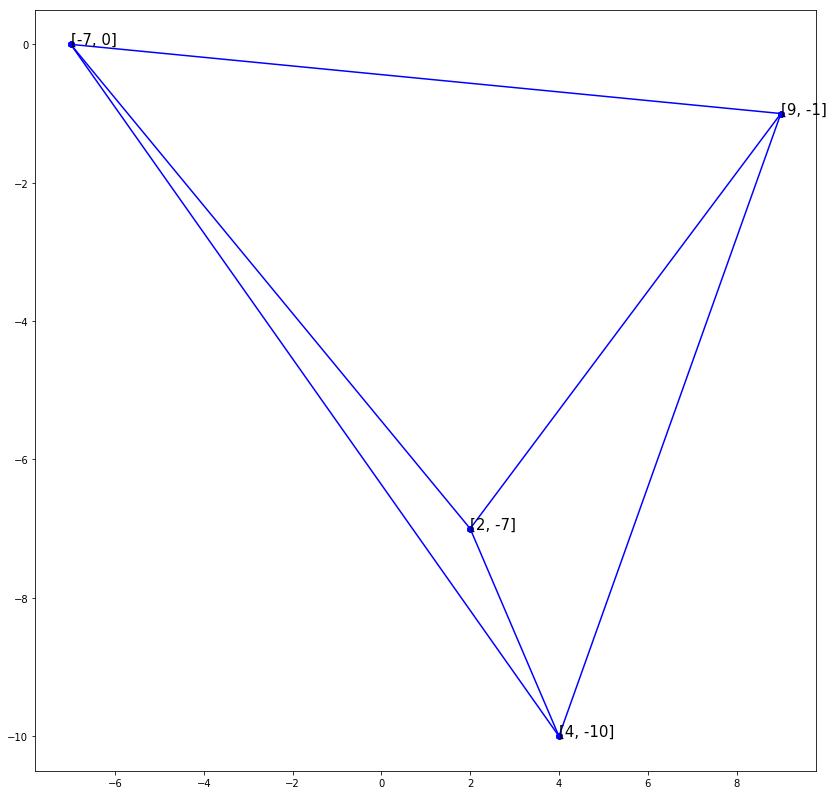

In [269]:
show(Eres,M=M)

# ШАГ 2: проверка какого-нибудь треугольника из триангуляции на выполнение условия Делоне

In [112]:
def Less(A,B):
    return (A[1]<B[1]) or (A[1]==B[1] and A[0]<B[0])

In [375]:
def delaunay(a1,a2,a3,A):
    '''
    проверка условия Делоне для одного треугольника и для одной точки
    
    сначала вычисляем расположение центра описанной около треугольника окружности.
    если расстояние от исследуемой точки А до центра больше радиуса окружности, то точка А
    лежит вне окружности => условие выполняется.
    '''
    c = np.array([[a1[0]**2+a1[1]**2-a3[0]**2-a3[1]**2, 2*(a1[1]-a3[1])],
                  [a2[0]**2+a2[1]**2-a3[0]**2-a3[1]**2, 2*(a2[1]-a3[1])]])
    d1 = np.array([[2*(a1[0]-a3[0]),2*(a1[1]-a3[1])],
                  [2*(a2[0]-a3[0]),2*(a2[1]-a3[1])]])
    e = np.array([[2*(a1[0]-a3[0]), a1[0]**2+a1[1]**2-a3[0]**2-a3[1]**2],
                  [2*(a2[0]-a3[0]), a2[0]**2+a2[1]**2-a3[0]**2-a3[1]**2]])
    det = np.linalg.det
    x0 = det(c)/det(d1)
    y0 = det(e)/det(d1)
    delaunay.p = [x0,y0]
    return d([x0,y0],A) >= d(a1,[x0,y0]) or np.isclose(d(a1,[x0,y0]),d([x0,y0],A))

In [319]:
def fullDelaunay(a1,a2,a3,M):
    '''
    проверка условия Делоне для одного треугольника и всех точек из М
    '''
    for m in M:
        if delaunay(a1,a2,a3,m) == False: return m
    return True

# Далее посмотрим на все три треугольника из триангуляции и проверим выполнение условия Делоне. Если функция вернет True - условие выполняется

In [398]:
t1 = ([4,-10],[2,-7],[9,-1])
t2 = ([4,-10],[2,-7],[-7,0])
t3 = ([2,-7],[-7,0],[9,-1])

# проверяем первый треугольник:

In [399]:
fullDelaunay(*t1,M)

True

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


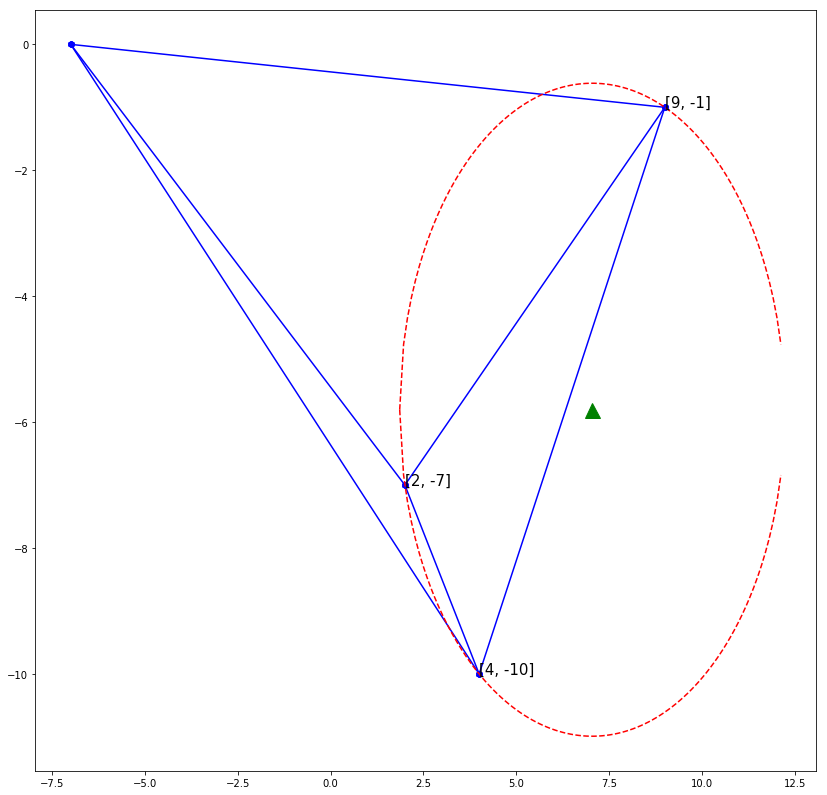

In [400]:
show(Eres,M=t1,P =delaunay.p,circ = True)

# проверяем второй треугольник:

In [401]:
fullDelaunay(*t2,M)

True

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


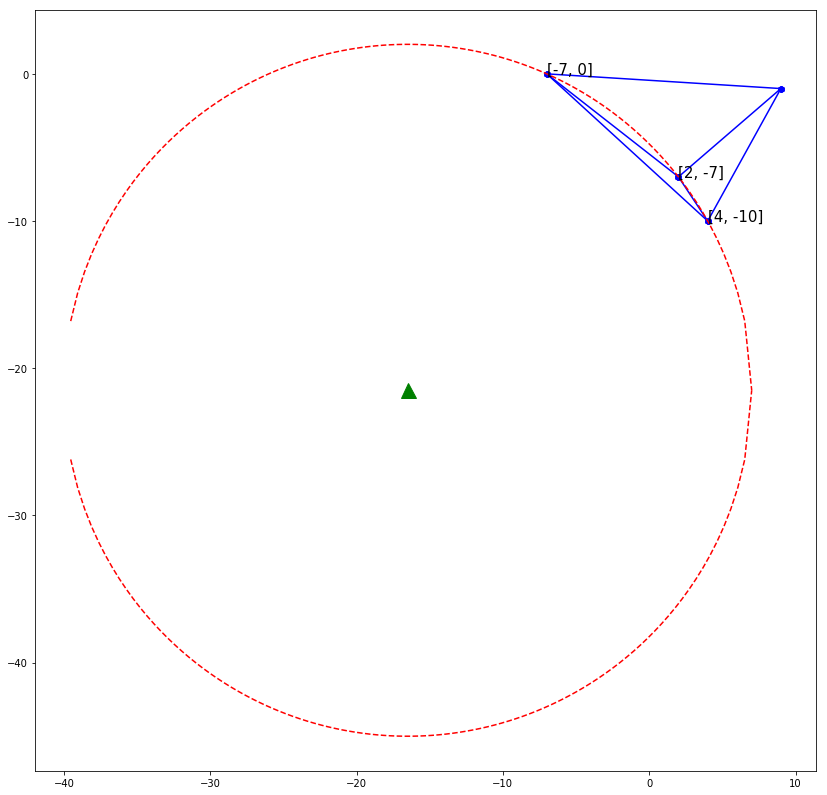

In [402]:
show(Eres,M=t2,P =delaunay.p,circ = True)

# проверяем третий треугольник:

In [396]:
fullDelaunay(*t3,M)

True

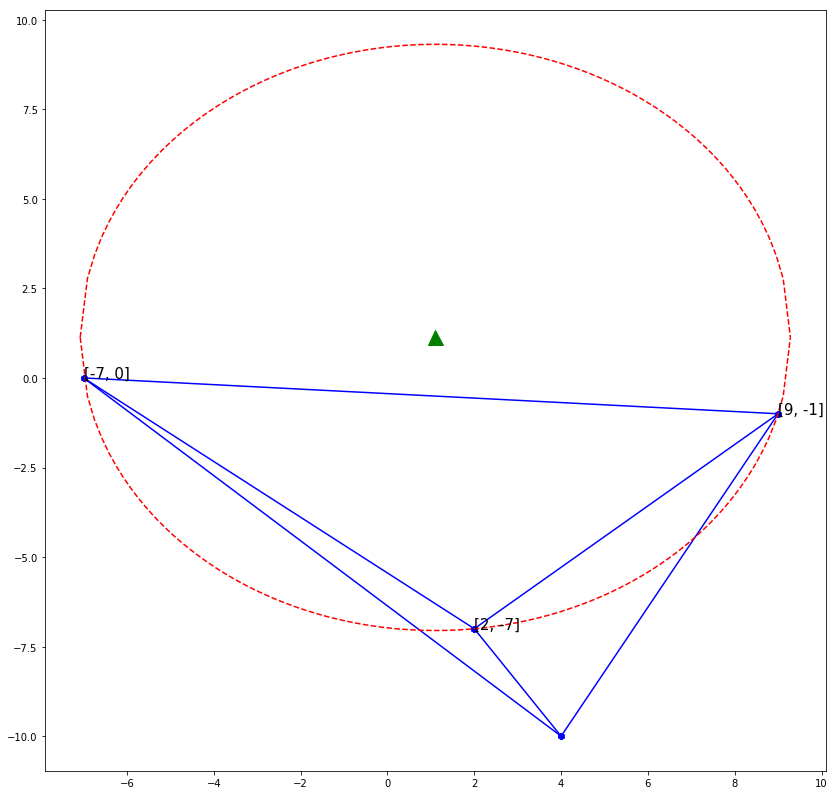

In [397]:
show(Eres,M=t3,P =delaunay.p,circ = True)

# Посмотрим на триангуляцию с большим количеством точек

In [422]:
# генерируем список точек
a,b = 1000,1000
n = 50
ys = np.random.randint(-a,a,n)
xs = np.random.randint(-b,b,n)
M = [[float(xs[i]),float(ys[i])] for i in range(len(xs))]
M = [[i[0],i[1]] for i in np.unique(M,axis = 0).astype(int)]
M = quicksort(M,Less)

In [423]:
# выделяем триангуляцию
Eres = makeTriang(M)

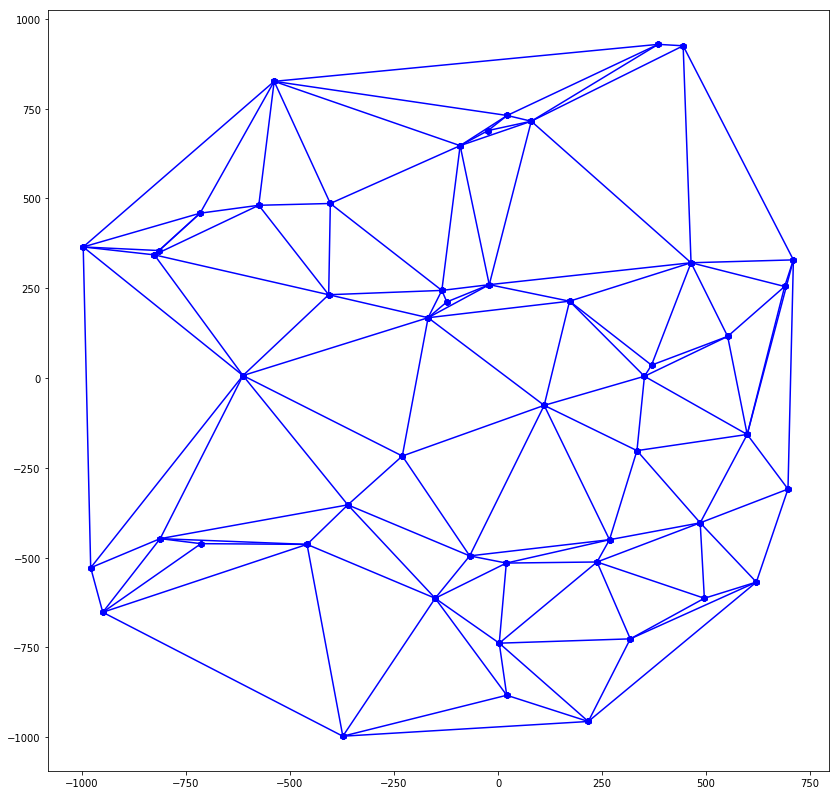

In [424]:
show(Eres)